<a href="https://colab.research.google.com/github/HanlunAI/ATasteOfDeepLearning/blob/main/ST5_002_Modern.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Taste of Deep Learning through Python 
## Session 2: The Modern

Learn the past, watch the present, and create the future.

-- Jess Conrad

### 2.0 The story of ABC

A modern approach to perform supervised learning with massive data is to employ some Deep Learning Package to perform stochastic gradient descent. A turning point in history is 2012's [ImageNet ILSVRC](https://image-net.org/challenges/LSVRC/2012/) when deep neural networks came to the spotlight of modern AI. In the competition, one is given numerous training **images as input** and corresponding **labels as output**, and the task is to build a model that could map testing images input to the desired label output. That is a classification task with input of high dimension!

![picture](https://drive.google.com/uc?id=1VEekyMKNvjnijMcycEzR_ypdyCcNKKWp)

(combined figure thanks to [Andrej Karpathy](https://cs.stanford.edu/people/karpathy/cnnembed/) from Stanford)

With two [GTX 580 3GB GPUs](https://www.techpowerup.com/gpu-specs/geforce-gtx-580.c270), a team from University of Toronto won the competition with a deep convolutional neural network [AlexNet](https://proceedings.neurips.cc/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf). It was GPUs that provided sufficient **Computing Power** to digest the **Big Data** of images to build an **AI** based on deep neural networks (a.k.a. [deep learning](https://www.deeplearningbook.org/)) to outperform other teams. The field had been dominated by deep neural networks since then. Later in 2015, the winning of the same competition outperformed humans and the winner model [ResNet](https://arxiv.org/abs/1512.03385?context=cs) had found applications in many other domains.

![picture](https://drive.google.com/uc?id=1f9pD8LmPkQXWvNYfq_TZcZjzPonN1Ug_)

Performing deep learning is essentially performing **optimization** to minimize the **loss function** of a **composition of linear and nonlinear functions** that attempt to approximate the required input-output mapping. To get a taste, we will only need to have to pick up one more concept to deal with non-linearity; because in [the last notebook](https://github.com/HanlunAI/ATasteOfDeepLearning/blob/main/ST5_001_Classics.ipynb), we've seen techniques to deal with massive data with different dimensions.

### 2.1 Derivatives: Handling Non-linearity with Linear Approximation

Many common functions are non-linear. [Linear approximation](https://en.wikipedia.org/wiki/Linear_approximation), when that exists, provides a handy way to deal with non-linearity. At a suitable point of a function, the gradient of the linear approximation corresponds to the [derivative](https://en.wikipedia.org/wiki/Derivative) of the function at that point. For single-valued functions, the gradient is also called a slope; whereas for a multivariate function, at each point of evaluation, information about its gradient is stored in the [Jacobian matrix](https://en.wikipedia.org/wiki/Jacobian_matrix_and_determinant).

For example, to make a dense layer in a neural network, one simply **composite** a **nonlinear function** $f$ whose linear approximation exists almost everywhere (such as ReLu, tanh, etc.) with a **linear transform** $\textbf{Wx}$ added to a bias $\textbf{b}$. **Such compositions are usually done again and again for many times in a deep nerual network.**

![picture](https://drive.google.com/uc?id=16QViOhwXeuFm7ohHL2j9tbog6A92aB9J)

Information about its gradient with respect to $\textbf{x}$ can be found by compositing the derivative of $f$ and the matrix $W$ with a technique in calculus known as the [chain rule](https://machinelearningmastery.com/the-chain-rule-of-calculus-for-univariate-and-multivariate-functions/). Interested audience should take either subject M1/M2 to build a solid foundation. (Notably, the use of dense layers in a neural network had been theoretically backed by the [universal approximation theorem](https://cognitivemedium.com/magic_paper/assets/Hornik.pdf).)

There are other examples that may involve other compositions of linear and nonlinear functions. Very common, a convolution layer reduces the number of parameters by assuming some geometric priors of the underlying space. Once again, when one is concerned with the gradient of these layers composed of various functions, one often employs *chain rule* to do the job.

### 2.2 Gradient Descent and Stochastic Gradient Descent

What's so great about the gradient? Well, we could perform optimization with gradient descent; or in practice, perform *stochastic gradient descent (SGD)* to process massive data with randomly selected mini-batch.

![picture](https://drive.google.com/uc?id=1VtHtXXjYMKUu-2lk6ch_wS0n_gZxnekG)

(Thanks to Harold Chao for 3D animation)

The mini-batch strategy is like what we went through in the last notebook. The major difference is that, this time we are minimizing a loss function that measures how large an error is in the input-output mapping; whereas in the last notebook we are maximizing the likelihood of how well a model is correct.

In practice, SGD is done by the so-called backpropagation commonly found in deep learning packages such as **TensorFlow** and **PyTorch**. The optimization process is called training of deep neural networks and computation graphs are often studied.

![picture](https://drive.google.com/uc?id=1Wbxic-P6JryC2soC--tAvGZQXusFF7dK)

(From TensorFlow)

### 2.3 Classification of Images

Enough talk? Let's get our hands on!

### 2.3.1 Classical Example: Classifying Digits

**2.3.1.1** First of all, let's **import** the required packages and the dataset MNIST.

*To announce in workshop: setup Runtime*

In [ ]:
!pip install tensorflow
from numpy import random
import numpy as np
import keras
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, Sequential
import numpy as np
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
11501568/11490434 [==============================] - 0s 0us/step


Each datum from MNIST has 28x28 pixels:

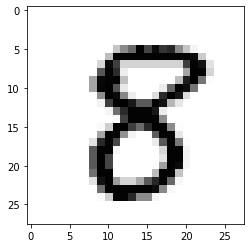

In [ ]:
datum = np.reshape(x_train[333], (28,28))
plt.imshow(datum,cmap='Greys')
plt.show()

Continue to run the next code cell to see more training data

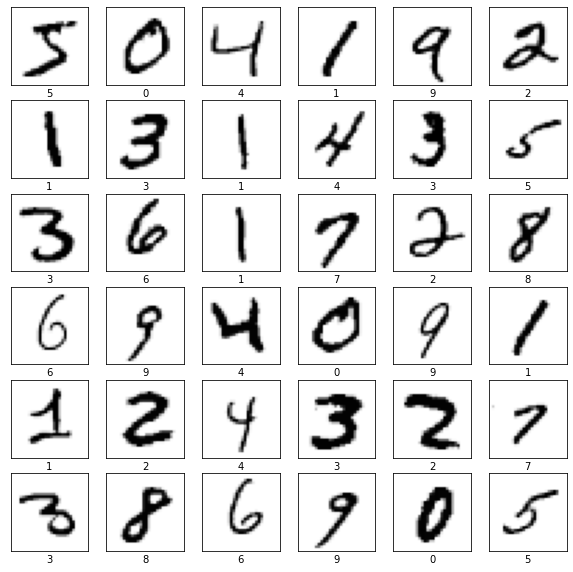

In [ ]:
plt.figure(figsize=(10,10))
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    plt.imshow(x_train[i][:,:], cmap='Greys')
    class_name = y_train[i]
    plt.xlabel(class_name)

**2.3.1.2 Here we build our model:**

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(8,5, activation='relu', input_shape=(28, 28, 1),use_bias = True, padding = 'same'))
model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(1,1), padding='same'))
model.add(layers.Conv2D(16,3, activation='relu',use_bias = True, padding = 'same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
model.add(layers.Conv2D(32,2, activation='relu',use_bias = True, padding = 'same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10,activation = 'softmax'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 8)         208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 28, 28, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 16)        1168      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 32)        2080      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 7, 7, 32)         0

Note that the model composed of many layers. The parameters to be trained provide the learning capability for the model to fit to training data by minimizing the loss. Convolution layers assumed some geometric priors and are able to extract features with much less parameters; whereas denses layers are like the regression see in [the previous notebook](https://github.com/HanlunAI/ATasteOfDeepLearning/blob/main/ST5_001_Classics.ipynb).  

Here we train our model:

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5,validation_data=(x_test, y_test))

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 26s 6ms/step - loss: 0.3938 - accuracy: 0.9380 - val_loss: 0.1138 - val_accuracy: 0.9663
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0786 - accuracy: 0.9761 - val_loss: 0.0653 - val_accuracy: 0.9801
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0605 - accuracy: 0.9812 - val_loss: 0.0603 - val_accuracy: 0.9822
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0513 - accuracy: 0.9843 - val_loss: 0.0699 - val_accuracy: 0.9800
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0451 - accuracy: 0.9857 - val_loss: 0.0557 - val_accuracy: 0.9823


Test the model:

In [ ]:
predict_dataset = tf.convert_to_tensor(x_train[0:3])
# training=False is needed only if there are layers with different
# behavior during training versus inference (e.g. Dropout).
predictions = model(predict_dataset, training=False)
for i, logits in enumerate(predictions):
  class_idx = tf.math.argmax(logits).numpy()
  name = class_idx
  print("Example {} : prediction: {} , Actual: {}".format(i, name,y_train[i]))
  if name == y_train[i]:
    print("Yes, our model prediction is correct!")
  else:
    print("Sorry, our model didn't make it this time.")

Example 0 : prediction: 5 , Actual: 5
Yes, our model prediction is correct!
Example 1 : prediction: 0 , Actual: 0
Yes, our model prediction is correct!
Example 2 : prediction: 4 , Actual: 4
Yes, our model prediction is correct!


**2.3.1.3 Extra online materials:**

*   For audience interested in more details, you may want to watch [3Blue1Brown's series on neural network](https://www.youtube.com/playlist?list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi) after the workshop.
*   While the usual convolution layer concerned with prior information on planar translation, we followed [Cohen et al.'s paper](https://arxiv.org/abs/1902.04615) to implement neural network with built-in knowledge in other *geometric priors* a few years ago. Interested audience please check out [our medium post](https://hanlunai2018.medium.com/reimplementing-a-gauge-equivariant-icosahedral-cnn-for-spherical-images-29fb6ad42925).

##2.3.2 Visualizing the classification

To get a better picture of what a classification task has done, one may find a low-dimensional visualization of the high dimensional data. Thanks to prior works of Laurens van der Maaten, Sam Roweis and Geoffrey Hinton, we have a convenient tool called [t-SNE](https://lvdmaaten.github.io/tsne/) for this purpose. It may take a while to run the following cells. Note that this is a stochastic embedding and so you may try running again (or look at the result of your neighbors) for another visualization.

In [ ]:
from sklearn.manifold import TSNE
inspect_points = 10000
x_t = np.reshape(x_train, (60000, 28*28))
y_t = np.reshape(y_train, (60000, 1))
idx = np.random.randint(60000,size = inspect_points)
train = np.concatenate((y_t[idx,:], x_t[idx,:]),axis=1)
tsne = TSNE(n_components = 2)
tsne_res = tsne.fit_transform(train)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


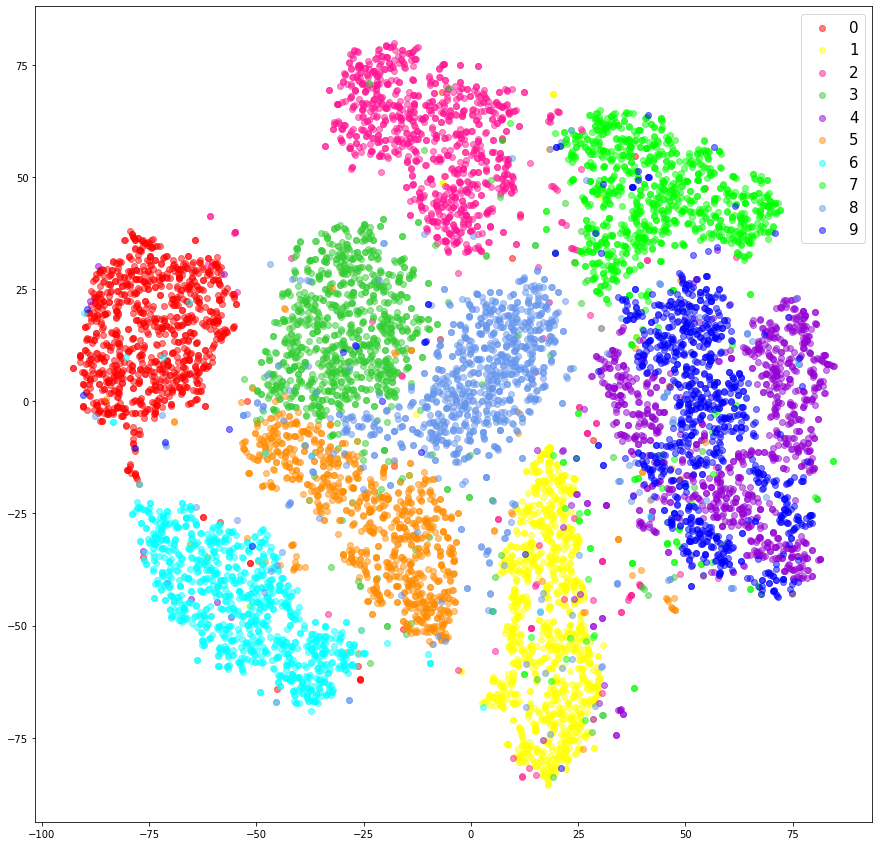

In [ ]:
#choices of cmap: 'dimgray', 'silver', 'rosybrown', 'brown', 'salmon', 'orangered', 'darkorange', 'peachpuff', 'tan', 'gold', 'khaki', 'olivedrab', 'yellowgreen', 'lawngreen', 'palegreen', 'limegreen', 'mediumseagreen', 'springgreen', 'aqua', 'powderblue', 'steelblue', 'slategray', 'cornflowerblue', 'blue', 'slateblue', 'blueviolet', 'thistle', 'deeppink', 'lightpink'
#more choices from here https://matplotlib.org/stable/gallery/color/named_colors.html
plt.subplots(figsize=(15,15)) 
X = tsne_res[:,0] 
Y = tsne_res[:,1] 
colors = ['red', 'yellow', 'deeppink','limegreen',  'darkviolet','darkorange', 'aqua',  'lime', 'cornflowerblue','blue']
for i in range(10):
  plt.scatter(X[train[:,0]==i], Y[train[:,0]==i], color=colors[i], alpha = 0.5)
plt.legend(('0','1','2','3','4','5','6','7','8','9'), prop={'size': 15} )
plt.show()

## 2.3.3 Let's Have Some Fun: Sudoku!


Recall that valuable perception tasks are often the last miles of automation pipelines, and at the same time, the extra miles of previous systems. 

What's so good about training a computer to recognize digits? Well, it completed the pipeline to solve Sudoku! 



**2.3.3.1 The pipeline, what we have done and conditions of use**


In this section, we will present a web application largely based on [Colin Eberhardt's work](https://blog.scottlogic.com/2020/01/03/webassembly-sudoku-solver.html). The **pipeline** mainly consisted of:
1.   Preprocessing and perspective transform
2.   Recognising digits
3.   Solving a puzzle with constraint satisfaction
4.   Overlay of result with specific perspective transform


The seemingly difficult steps 1, 2, and 4, however, could be tackled easily by computers since the early days, leaving step 3 the last piece of the puzzle for an automatic solution to the task. Ironically, while step 3 was hard for a computer to handle; it is almost a trivial task to many human with the perception of vision. And here is where deep learning comes to the rescue!

To recognize a sudoku puzzle, there are a total of 81 boxes need to be recognize, each correspond to one of the 10 classes out of (1,2,3,4,5,6,7,8,9 and blank), a bit different from MNIST. 

Our **work done** is to boost the accuracy of the performance as much as possible. Note that the scanning of Sudoku is much more demanding than the scanning of QR code for two essential challenges:-
1.   Each pixel in scanning of QR code involves only binary classification; whereas each box in scanning of a Sudoku involve 10 possibilities
2.   QR code has some resistance to error in scanning by redundancy included in design; whereas a Sudoku is designed to have no/low redundancy so that failure in scanning of a single box would lead to complete failure in the recognition of the model. 

Like other applications of deep learning (a.k.a. deep neural network), the trained model depends much on the input training data. To boost overall performance of Colin's codes in [TensorFlow.js](https://github.com/tensorflow/tfjs), we simply increase the variety of input data by more fonts, and add noise in training data to enhance model robustness.

![picture](https://drive.google.com/uc?id=1vZIn99jdJNwbedLEXk7FJvJ00IUZcjmd)

For **conditions of use**, note that:-
1.   Training data here are based on computer generated fonts, so the application won't work on handwritten puzzles, nor fonts that it hasn't seen. Well, unless you train your version with these as training data ;)
2.   Preprocessing concerns only perspective transform but not curvature; so it's important to keep your paper unbent in the scanning!

**2.3.3.2 It's time for the Game**

Now you may take out your phone and ask for a puzzle from us to [try this out](https://hanlunai.github.io/wasm-sudoku-solver/)! You may also use your phone to scan this QR code, click "Live Camera" and scroll down after you reach the web application:

![picture](https://drive.google.com/uc?id=1f0M8Hrfrv5ZC5EL5HblY5MrHhMFUUAU2)

Or simply watch this demonstration video:

In [ ]:
from IPython.display import HTML
HTML('<iframe width="960" height="540" src="https://www.youtube.com/embed/3icb6AdGC4o" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>')

## 2.3.4 More Practical Use Cases: OCR, other tasks in CV...

It's now your turn to tell us your understanding of what Optical Character Recognition/ Computer Vision/ other perception tasks can do. Does it complete the last mile of an automation pipeline? Please respond with this [Google Form](https://forms.gle/5s3UfK4yjLLfvxMT9).

© Hanlun Artificial Intelligence Limited